In [2]:
import numpy as np
from collections import Counter
np.random.seed(1)

In [494]:
PLAYER_POOL = 100
DIMENSIONS = 10

In [495]:
# [hr, steals, age]
# in our constructed example, over 20 HR or 20 steals is an all-star

# generate lots of players based on rules
players = []
labels = []
def classify(p):
    hr = p[0]
    steals = p[1] 
    ks = p[2]
    def_rating = p[3]
    marketability = p[4]
    clubhouse = p[7]
    
    if hr > 50:
        return 1
#     if def_rating > 61:
#         return 1
#     if marketability > 90:
#         return 1
#     if clubhouse < 10:
#         return 0
    
    return 0


for i in range(PLAYER_POOL):
    player = np.random.randint(100, size=(DIMENSIONS,))
    players.append(player)
    labels.append(classify(player))
    
print('Generated {} players ({})'.format(len(players), Counter(labels)))

normalized_players = np.array([p / 100. for p in players])
labels = np.array([labels])

print('Normalized example', normalized_players[0])
print('Label', more_labels[0])
print('Actual example', normalized_players[0] * 100.)

Generated 100 players (Counter({1: 55, 0: 45}))
('Normalized example', array([ 0.39,  0.24,  0.86,  0.15,  0.27,  0.47,  0.75,  0.22,  0.41,  0.31]))
('Label', 1)
('Actual example', array([ 39.,  24.,  86.,  15.,  27.,  47.,  75.,  22.,  41.,  31.]))


In [496]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def deriv_sigmoid(x):
    return x * (1 - x)

class NN(object):
    def __init__(self, training, labels, weights):
        self.training = training
        self.labels = labels
        self.weights = weights
        
    def predict(self):
        return sigmoid(np.dot(self.training, self.weights))
    
    def train(self, iterations, print_every=100):
        error = None
        i = None
        for i in range(iterations):
            output_labels = self.predict()
            error = self.labels - output_labels
            # gradient descent
            nudge = np.dot(self.training.T, error * deriv_sigmoid(output_labels))
            self.weights += nudge
            if i % print_every == 0:
                print('Accuracy on iteration {}'.format(i), self.get_accuracy())
            
            
    def get_accuracy(self):
        output_labels = self.predict()
        correct = 0
        for idx, l in enumerate(output_labels):
            if l[0] > 0.5:
                prediction = 1
            else:
                prediction = 0
            # print('My predicition is {}'.format(prediction))
            # print('The correct is {}'.format(self.labels[idx][0]))
            if prediction == self.labels[idx][0]:
                correct += 1
        
        return round(correct / float(len(self.labels)), 2)
            
        

In [513]:
assert(normalized_players.shape[0] == PLAYER_POOL)
assert(labels.T.shape[0] == PLAYER_POOL)
nn = NN(normalized_players, labels.T, 2 * random.random((DIMENSIONS, 1)) - 1)


nn.train(30, print_every=1)
        


('Accuracy on iteration 0', 0.55)
('Accuracy on iteration 1', 0.55)
('Accuracy on iteration 2', 0.7)
('Accuracy on iteration 3', 0.45)
('Accuracy on iteration 4', 0.45)
('Accuracy on iteration 5', 0.45)
('Accuracy on iteration 6', 0.45)
('Accuracy on iteration 7', 0.47)
('Accuracy on iteration 8', 0.55)
('Accuracy on iteration 9', 0.55)
('Accuracy on iteration 10', 0.56)
('Accuracy on iteration 11', 0.63)
('Accuracy on iteration 12', 0.46)
('Accuracy on iteration 13', 0.81)
('Accuracy on iteration 14', 0.6)
('Accuracy on iteration 15', 0.74)
('Accuracy on iteration 16', 0.58)
('Accuracy on iteration 17', 0.81)
('Accuracy on iteration 18', 0.83)
('Accuracy on iteration 19', 0.81)
('Accuracy on iteration 20', 0.72)
('Accuracy on iteration 21', 0.63)
('Accuracy on iteration 22', 0.86)
('Accuracy on iteration 23', 0.83)
('Accuracy on iteration 24', 0.82)
('Accuracy on iteration 25', 0.76)
('Accuracy on iteration 26', 0.82)
('Accuracy on iteration 27', 0.78)
('Accuracy on iteration 28', 0.8

In [3]:
# Working example via 
# https://medium.com/technology-invention-and-more/
# how-to-build-a-simple-neural-network-in-9-lines-of-python-code-cc8f23647ca1
# based off Andrew Trask post http://iamtrask.github.io/2015/07/12/basic-python-network/
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def deriv_sigmoid(x):
    # A little misleading - derivative is actually
    # sigmoid(x) * (1 - sigmoid(x))
    # but x here is preprocessed as sigmoid x
    # See http://kawahara.ca/how-to-compute-the-derivative-of-a-sigmoid-function-fully-worked-example/
    return x * (1 - x)

training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
print('Training input', training_set_inputs.shape)
training_set_outputs = np.array([[0, 1, 1, 0]]).T
print('Training output', training_set_outputs.shape)
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1
print('Starting weights', synaptic_weights)
for iteration in range(1):
    predictions = sigmoid(np.dot(training_set_inputs, synaptic_weights))
    error = training_set_outputs - predictions
    print(predictions)
    print(deriv_sigmoid(predictions))
    nudge = np.dot(training_set_inputs.T, error * deriv_sigmoid(predictions))
    synaptic_weights += nudge

print('Ending weights', synaptic_weights)

Training input (4, 3)
Training output (4, 1)
Starting weights [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
[[ 0.2689864 ]
 [ 0.3262757 ]
 [ 0.23762817]
 [ 0.36375058]]
[[ 0.19663272]
 [ 0.21981987]
 [ 0.18116102]
 [ 0.23143609]]
Ending weights [[ 0.12025406]
 [ 0.50456196]
 [-0.85063774]]


In [8]:
all_possible_combos = [
    [1, 1, 1],
    [1, 1, 0],
    [1, 0, 0],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 0],
]

for combo in all_possible_combos:
    print('Prediction for {}'.format(combo), 1 / (1 + np.exp(-(np.dot(np.array(combo), synaptic_weights)))))

Prediction for [1, 1, 1] [ 0.99938858]
Prediction for [1, 1, 0] [ 0.99999956]
Prediction for [1, 0, 0] [ 0.99999971]
Prediction for [1, 0, 1] [ 0.99959245]
Prediction for [0, 1, 1] [ 0.00048094]
Prediction for [0, 0, 1] [ 0.0007215]
Prediction for [0, 1, 0] [ 0.3999127]
Prediction for [0, 0, 0] [ 0.5]


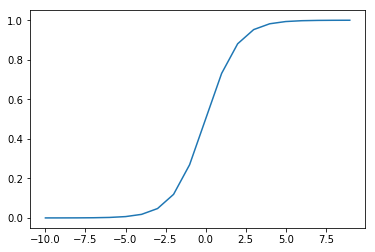

In [16]:
import numpy as np  
import matplotlib.pyplot as plt  

%matplotlib inline
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

graph('1/(1 + 2.71828**-x)', range(-10, 10))


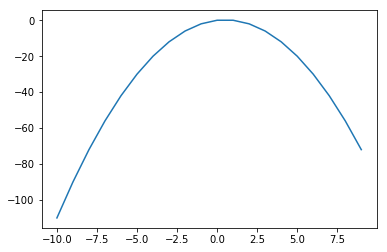

In [15]:
graph('x * (1-x)', range(-10, 10))